# Tsna plot

In [46]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

import pickle

with open("../output_preprocessing/positive.pkl", "rb") as f:   # rb = read-binary
    positive = pickle.load(f)

with open("../output_preprocessing/negative.pkl", "rb") as f:   # rb = read-binary
    negative = pickle.load(f)

with open("../output_preprocessing/negative_filtered.pkl", "rb") as f:   # rb = read-binary
    negative_filtered = pickle.load(f)

positive=positive[0:1000]
negative = negative[0:1000]
negative_filtered = negative_filtered[0:1000]


processed_data = positive+negative
labels = len(positive)*[1]+len(negative)*[0]

processed_data_filtered = positive+negative_filtered
labels_filtered = len(positive)*[1]+len(negative_filtered)*[0]

In [53]:
def tsne_plot(texts):
    # Step 0: Convert list of tokenized texts -> numeric sparse matrix
    vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)
    X = vectorizer.fit_transform(texts)

    # Step 1: Reduce dimensionality with TruncatedSVD
    svd = TruncatedSVD(n_components=20, random_state=42)
    X_reduced = svd.fit_transform(X)

    # Step 2: Apply t-SNE on reduced data
    tsne = TSNE(n_components=3, init="pca", perplexity=30, n_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X_reduced)

      

    print("Original shape:", X.shape)
    print("Reduced shape:", X_reduced.shape)
    print("t-SNE output shape:", X_tsne.shape)

    return X_tsne

tsn_unfiltered = tsne_plot(processed_data)
tsn_filtered = tsne_plot(processed_data_filtered)

/home/houcem/miniforge3/envs/data_env/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Original shape: (2000, 92)
Reduced shape: (2000, 20)
t-SNE output shape: (2000, 3)


/home/houcem/miniforge3/envs/data_env/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Original shape: (2000, 92)
Reduced shape: (2000, 20)
t-SNE output shape: (2000, 3)


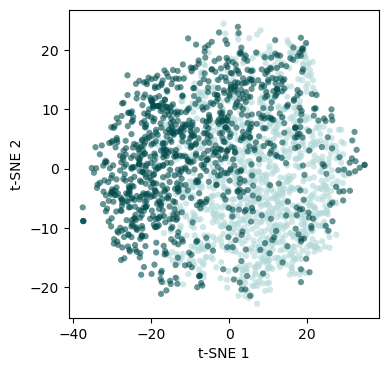

In [54]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define 2 colors
cmap = ListedColormap(["#004c4c", "#b2d8d8"])  # blue and orange as example

# Plot
plt.figure(figsize=(4, 4))
plt.scatter(
    tsn_unfiltered[:, 0], tsn_unfiltered[:, 1],
    c=labels,
    cmap=cmap,      # use our custom 2-color map
    s=20,
    alpha=0.6,
    edgecolors="none"
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()



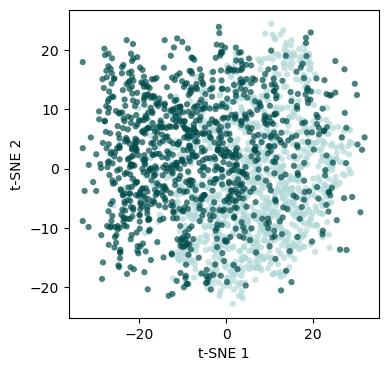

In [55]:
# Step 3: Plot results
plt.figure(figsize=(4, 4))
plt.scatter(
    tsn_filtered[:, 0], tsn_unfiltered[:, 1],
    c=labels_filtered, cmap=cmap, s=20, alpha=0.7, edgecolors="none"
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

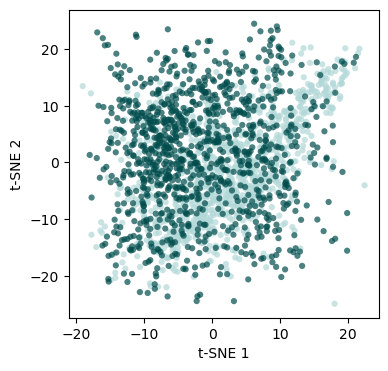

In [59]:
# Step 3: Plot results
plt.figure(figsize=(4, 4))
plt.scatter(
    tsn_filtered[:, 1], tsn_unfiltered[:, 2],
    c=labels_filtered, cmap=cmap, s=20, alpha=0.7, edgecolors="none"
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()